In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

In [2]:
df= pd.read_csv('dataset_train+test2.csv', sep=",")

In [3]:
df.head()

,date,Temperature,Humidity,Light,CO2,Occupancy,Ora,day,hour,absH,weekend,out_of_turn
0,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,1,2,4,17:51:00,17,0.0,1.0
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,1,2,4,17:51:59,17,0.0,1.0
2,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,1,2,4,17:53:00,17,0.0,1.0
3,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,1,2,4,17:54:00,17,0.0,1.0
4,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,1,2,4,17:55:00,17,0.0,1.0


In [4]:
df.shape

(17895, 12)

In [5]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [6]:
class_name= "Occupancy"

In [7]:
df = df[['Temperature', 'Light', 'CO2', 'Occupancy', ]]

In [8]:
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

# data nomrlaization


In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Sklearn Multilayer Perceptron

In [11]:
from sklearn.neural_network import MLPClassifier


In [12]:
clf = MLPClassifier(random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9923635686347551
F1-score [0.9951416  0.98216616]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4235
           1       0.97      1.00      0.98      1134

    accuracy                           0.99      5369
   macro avg       0.98      0.99      0.99      5369
weighted avg       0.99      0.99      0.99      5369



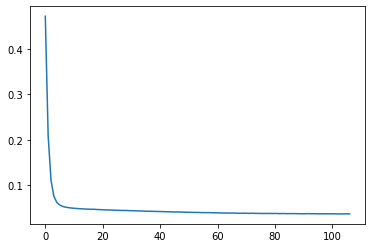

In [13]:
plt.plot(clf.loss_curve_)
plt.show()

In [14]:
clf = MLPClassifier(hidden_layer_sizes=(128, 64, 32,), alpha=0.1, learning_rate='adaptive', 
                    activation='tanh', early_stopping=False, momentum=0.9, random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9923635686347551
F1-score [0.99514045 0.98218166]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4235
           1       0.97      1.00      0.98      1134

    accuracy                           0.99      5369
   macro avg       0.98      0.99      0.99      5369
weighted avg       0.99      0.99      0.99      5369



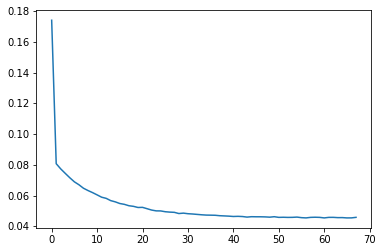

In [15]:
plt.plot(clf.loss_curve_)
plt.show()

In [16]:
params = [{'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0,'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'adam', 'learning_rate_init': 0.01}]

labels = ["constant learning-rate", "constant with momentum",
          "inv-scaling learning-rate", "inv-scaling with momentum", "adam"]

In [17]:
import warnings
from sklearn.exceptions import ConvergenceWarning

constant learning-rate
training set score and loss: 0.789, 73.138059


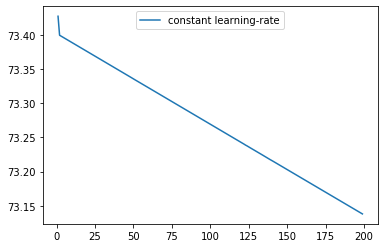

constant with momentum
training set score and loss: 0.789, 7131.510333


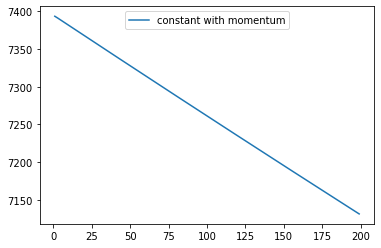

inv-scaling learning-rate
training set score and loss: 0.789, 73.401101


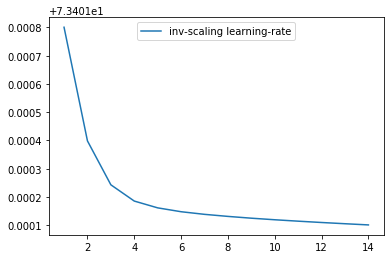

inv-scaling with momentum
training set score and loss: 0.789, 7393.948020


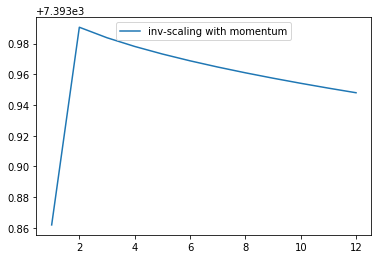

adam
training set score and loss: 0.991, 0.050019


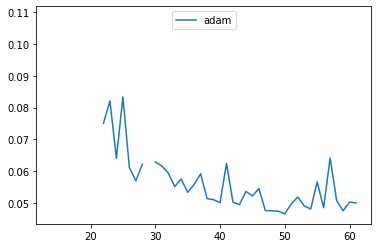

In [18]:
for label, param in zip(labels, params):
    print(label)
    clf = MLPClassifier(random_state=0, max_iter=200, **param)

    
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
        clf.fit(X, y)

    print("training set score and loss: %.3f, %f" % (clf.score(X, y), clf.loss_))
    plt.plot(clf.loss_curve_, label=label)
    plt.legend(loc="upper center")
    plt.show()

# Keras Deep Neural Networks

In [19]:
from keras.models import Sequential
from keras.layers import Dense

Using Theano backend.
/Users/francescosalerno/opt/anaconda3/lib/python3.7/site-packages/theano/configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [20]:
def build_model():
    
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(128, input_dim=n_feature, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [21]:
model1 = build_model()

history1 = model1.fit(X_train, y_train, epochs=20, batch_size=50).history

Epoch 1/20
12526/12526 [==============================] - 341s 27ms/step - loss: 0.1169 - accuracy: 0.9763
Epoch 2/20
12526/12526 [==============================] - 341s 27ms/step - loss: 0.0454 - accuracy: 0.9889
Epoch 3/20
12526/12526 [==============================] - 2491s 199ms/step - loss: 0.0444 - accuracy: 0.9889
Epoch 4/20
12526/12526 [==============================] - 347s 28ms/step - loss: 0.0437 - accuracy: 0.9892
Epoch 5/20
12526/12526 [==============================] - 340s 27ms/step - loss: 0.0426 - accuracy: 0.9895
Epoch 6/20
12526/12526 [==============================] - 339s 27ms/step - loss: 0.0420 - accuracy: 0.9891
Epoch 7/20
12526/12526 [==============================] - 865s 69ms/step - loss: 0.0407 - accuracy: 0.9896
Epoch 8/20
12526/12526 [==============================] - 371s 30ms/step - loss: 0.0402 - accuracy: 0.9899
Epoch 9/20
12526/12526 [==============================] - 379s 30ms/step - loss: 0.0396 - accuracy: 0.9897
Epoch 10/20
12526/12526 [==========

In [23]:
model2 = build_model()

history2 = model2.fit(X_train, y_train, epochs=20, batch_size=250).history

Epoch 1/20
12526/12526 [==============================] - 177s 14ms/step - loss: 0.3437 - accuracy: 0.9237
Epoch 2/20
12526/12526 [==============================] - 182s 14ms/step - loss: 0.0609 - accuracy: 0.9886
Epoch 3/20
12526/12526 [==============================] - 189s 15ms/step - loss: 0.0501 - accuracy: 0.9886
Epoch 4/20
12526/12526 [==============================] - 183s 15ms/step - loss: 0.0479 - accuracy: 0.9889
Epoch 5/20
12526/12526 [==============================] - 181s 14ms/step - loss: 0.0467 - accuracy: 0.9891
Epoch 6/20
12526/12526 [==============================] - 179s 14ms/step - loss: 0.0460 - accuracy: 0.9895
Epoch 7/20
12526/12526 [==============================] - 182s 15ms/step - loss: 0.0457 - accuracy: 0.9890
Epoch 8/20
12526/12526 [==============================] - 179s 14ms/step - loss: 0.0446 - accuracy: 0.9894
Epoch 9/20
12526/12526 [==============================] - 179s 14ms/step - loss: 0.0445 - accuracy: 0.9894
Epoch 10/20
12526/12526 [============

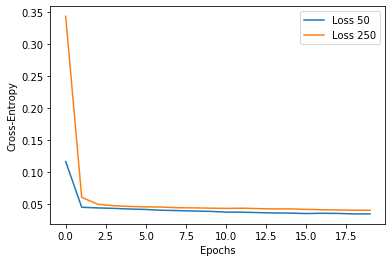

In [24]:
plt.plot(history1['loss'], label='Loss 50')
plt.plot(history2['loss'], label='Loss 250')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()

In [26]:
test_loss_1, test_acc_1 = model1.evaluate(X_test, y_test)
test_loss_2, test_acc_2 = model2.evaluate(X_test, y_test)

print('Loss %f, Accuracy %f' % (test_loss_1, test_acc_1))
print('Loss %f, Accuracy %f' % (test_loss_2, test_acc_2))

5369/5369 [==============================] - 40s 8ms/step
Loss 0.031679, Accuracy 0.992177
Loss 0.034968, Accuracy 0.991991


In [28]:
y_pred = model1.predict(X_test).astype(int)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.788787483702738
F1-score [0.8819242 0.       ]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      4235
           1       0.00      0.00      0.00      1134

    accuracy                           0.79      5369
   macro avg       0.39      0.50      0.44      5369
weighted avg       0.62      0.79      0.70      5369



In [29]:
model3 = build_model()

history3 = model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=250).history

Train on 12526 samples, validate on 5369 samples
Epoch 1/5
12526/12526 [==============================] - 228s 18ms/step - loss: 0.2992 - accuracy: 0.9336 - val_loss: 0.0714 - val_accuracy: 0.9896
Epoch 2/5
12526/12526 [==============================] - 228s 18ms/step - loss: 0.0579 - accuracy: 0.9878 - val_loss: 0.0449 - val_accuracy: 0.9905
Epoch 3/5
12526/12526 [==============================] - 216s 17ms/step - loss: 0.0491 - accuracy: 0.9884 - val_loss: 0.0419 - val_accuracy: 0.9909
Epoch 4/5
12526/12526 [==============================] - 231s 18ms/step - loss: 0.0474 - accuracy: 0.9888 - val_loss: 0.0411 - val_accuracy: 0.9912
Epoch 5/5
12526/12526 [==============================] - 225s 18ms/step - loss: 0.0462 - accuracy: 0.9888 - val_loss: 0.0391 - val_accuracy: 0.9918


In [31]:
test_loss_3, test_acc_3 = model3.evaluate(X_test, y_test)

print('Loss %f, Accuracy %f' % (test_loss_1, test_acc_1))
print('Loss %f, Accuracy %f' % (test_loss_2, test_acc_2))
print('Loss %f, Accuracy %f' % (test_loss_3, test_acc_3))

5369/5369 [==============================] - 34s 6ms/step
Loss 0.031679, Accuracy 0.992177
Loss 0.034968, Accuracy 0.991991
Loss 0.039098, Accuracy 0.991805


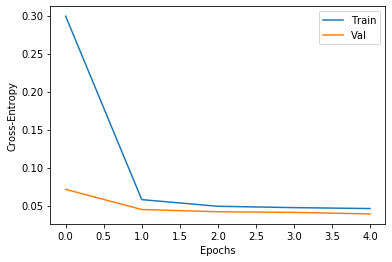

In [32]:
plt.plot(history3['loss'], label='Train')
plt.plot(history3['val_loss'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()

In [33]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

# Early Stopping¶

In [34]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [36]:
es = EarlyStopping(monitor='val_loss', patience=10)
mc = ModelCheckpoint('best_model_NOREG.h5', monitor='val_loss', save_best_only=True)

model4 = build_model()
history4 = model4.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, 
                      batch_size=250, callbacks=[es,mc]).history

Train on 10020 samples, validate on 2506 samples
Epoch 1/5
10020/10020 [==============================] - 139s 14ms/step - loss: 0.3295 - accuracy: 0.9565 - val_loss: 0.1042 - val_accuracy: 0.9848
Epoch 2/5
10020/10020 [==============================] - 143s 14ms/step - loss: 0.0648 - accuracy: 0.9882 - val_loss: 0.0610 - val_accuracy: 0.9872
Epoch 3/5
10020/10020 [==============================] - 165s 16ms/step - loss: 0.0482 - accuracy: 0.9891 - val_loss: 0.0577 - val_accuracy: 0.9872
Epoch 4/5
10020/10020 [==============================] - 156s 16ms/step - loss: 0.0457 - accuracy: 0.9896 - val_loss: 0.0561 - val_accuracy: 0.9864
Epoch 5/5
10020/10020 [==============================] - 161s 16ms/step - loss: 0.0444 - accuracy: 0.9893 - val_loss: 0.0554 - val_accuracy: 0.9864


In [37]:
test_loss_4, test_acc_4 = model4.evaluate(X_test, y_test)

print('Loss %f, Accuracy %f' % (test_loss_1, test_acc_1))
print('Loss %f, Accuracy %f' % (test_loss_2, test_acc_2))
print('Loss %f, Accuracy %f' % (test_loss_3, test_acc_3))
print('Loss %f, Accuracy %f' % (test_loss_4, test_acc_4))

5369/5369 [==============================] - 35s 6ms/step
Loss 0.031679, Accuracy 0.992177
Loss 0.034968, Accuracy 0.991991
Loss 0.039098, Accuracy 0.991805
Loss 0.040201, Accuracy 0.991432


In [39]:
from keras.regularizers import l2

def build_L2_model():
    # define the model
    model = Sequential()

    n_feature = X_train.shape[1]
    h_dim=100
    model.add(Dense(h_dim, activation='relu', input_shape=(n_feature,), kernel_regularizer=l2(0.01)))
    model.add(Dense(h_dim, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(h_dim, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(h_dim, activation='relu', kernel_regularizer=l2(0.01)))
    #linear activation
    model.add(Dense(1))

    #compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [41]:
mc = ModelCheckpoint('best_model_L2.h5', monitor='val_loss', save_best_only=True)

L2_model = build_L2_model()
h_L2 = L2_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, 
                    batch_size=250, callbacks=[es,mc]).history

Train on 10020 samples, validate on 2506 samples
Epoch 1/5
10020/10020 [==============================] - 406s 40ms/step - loss: 5.5801 - accuracy: 0.7889 - val_loss: 4.8239 - val_accuracy: 0.7885
Epoch 2/5
10020/10020 [==============================] - 381s 38ms/step - loss: 4.3810 - accuracy: 0.7890 - val_loss: 4.0200 - val_accuracy: 0.7885
Epoch 3/5
10020/10020 [==============================] - 391s 39ms/step - loss: 3.8125 - accuracy: 0.7890 - val_loss: 3.6551 - val_accuracy: 0.7885
Epoch 4/5
10020/10020 [==============================] - 398s 40ms/step - loss: 3.5615 - accuracy: 0.7890 - val_loss: 3.5006 - val_accuracy: 0.7885
Epoch 5/5
10020/10020 [==============================] - 381s 38ms/step - loss: 3.4587 - accuracy: 0.7890 - val_loss: 3.4404 - val_accuracy: 0.7885


In [42]:
from keras.layers import Dropout

def build_DROPOUT_model():
    # define the model
    model = Sequential()

    n_feature = X_train.shape[1]
    h_dim=100
    model.add(Dense(h_dim, activation='relu', input_shape=(n_feature,)))
    model.add(Dropout(0.2))
    model.add(Dense(h_dim, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(h_dim, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(h_dim, activation='relu'))
    #linear activation
    model.add(Dense(1))

    #compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [44]:
mc = ModelCheckpoint('best_model_DROPOUT.h5', monitor='val_loss', save_best_only=True)

DROPOUT_model = build_DROPOUT_model()
h_DROPOUT = DROPOUT_model.fit(X_train, y_train, validation_data=(X_val, y_val), 
                              epochs=3, batch_size=250, callbacks=[es,mc]).history

Train on 10020 samples, validate on 2506 samples
Epoch 1/3
10020/10020 [==============================] - 666s 66ms/step - loss: 0.1849 - accuracy: 0.8466 - val_loss: 0.1546 - val_accuracy: 0.7283
Epoch 2/3
10020/10020 [==============================] - 693s 69ms/step - loss: 0.1321 - accuracy: 0.7764 - val_loss: 0.1455 - val_accuracy: 0.9078
Epoch 3/3
10020/10020 [==============================] - 671s 67ms/step - loss: 0.1326 - accuracy: 0.7637 - val_loss: 0.1593 - val_accuracy: 0.7478


In [45]:
from keras.models import load_model

best_NOREG_model = load_model('best_model_NOREG.h5')
best_L2_model = load_model('best_model_L2.h5')
best_DROPOUT_model = load_model('best_model_DROPOUT.h5')

loss_NOREG, acc_NOREG = best_NOREG_model.evaluate(X_test, y_test)
loss_L2, acc_L2 = best_L2_model.evaluate(X_test, y_test)
loss_DROPOUT, acc_DROPOUT = best_DROPOUT_model.evaluate(X_test, y_test)

5369/5369 [==============================] - 138s 26ms/step


In [46]:
print('Loss %f, Accuracy %f' % (loss_NOREG, acc_NOREG))
print('Loss %f, Accuracy %f' % (loss_L2, acc_L2))
print('Loss %f, Accuracy %f' % (loss_DROPOUT, acc_DROPOUT))

Loss 0.040201, Accuracy 0.991432
Loss 3.435924, Accuracy 0.788787
Loss 0.102973, Accuracy 0.909853


# Hyper-Parameter Tuning¶

In [47]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV

In [48]:
def build_model(n_layers=2, h_dim=64, activation='relu', optimizer='adam'):
    # define the model
    model = Sequential()

    n_feature = X_train.shape[1]
    
    model.add(Dense(h_dim, activation=activation, input_shape=(n_feature,)))
    for i in range(n_layers-1):
        model.add(Dense(h_dim, activation=activation))
    #linear activation
    model.add(Dense(1))

    #compile the model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

In [49]:
n_layers = [1, 2, 3]
h_dim = [32, 64, 128]
activation = ['relu', 'tanh']
optimizer = ['adagrad', 'adam']
params = dict(optimizer=optimizer, n_layers=n_layers, h_dim=h_dim, activation=activation)

In [52]:
model = KerasRegressor(build_fn=build_model)

rnd = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter=5, cv=3)
rnd_result = rnd.fit(X_train, y_train, epochs=3, batch_size=250, verbose=0)

3340/3340 [==============================] - 13s 4ms/step


In [53]:
print("Best: %f using %s" % (-rnd_result.best_score_, rnd_result.best_params_))
means = rnd_result.cv_results_['mean_test_score']
stds = rnd_result.cv_results_['std_test_score']
params = rnd_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (-mean, stdev, param))

Best: 0.097162 using {'optimizer': 'adam', 'n_layers': 1, 'h_dim': 128, 'activation': 'relu'}
0.101449 (0.023243) with: {'optimizer': 'adagrad', 'n_layers': 2, 'h_dim': 32, 'activation': 'relu'}
0.286692 (0.263440) with: {'optimizer': 'adagrad', 'n_layers': 3, 'h_dim': 32, 'activation': 'tanh'}
0.148331 (0.014055) with: {'optimizer': 'adagrad', 'n_layers': 3, 'h_dim': 64, 'activation': 'tanh'}
0.103663 (0.019199) with: {'optimizer': 'adam', 'n_layers': 1, 'h_dim': 64, 'activation': 'tanh'}
0.097162 (0.014105) with: {'optimizer': 'adam', 'n_layers': 1, 'h_dim': 128, 'activation': 'relu'}


In [54]:
clf = rnd_result.best_estimator_.model

loss, acc = clf.evaluate(X_test, y_test)
print('Loss %f, Accuracy %f' % (loss, acc))

5369/5369 [==============================] - 20s 4ms/step
Loss 0.077708, Accuracy 0.722853
